# Plotting the band structure and projected density of states (pDOS) from Materials Project

_A more detailed description of the different features is given in the example [Plotting the band structure and projected density of states (pDOS) from Quantum ESPRESSO output-files](plots-band_structure_and_pdos_qe.ipynb)._

This notebook shows how to use the ``StructureImporter`` and ``BandStructurePlot`` class of the library to plot a band structure from materials project. First, we import data from the Materials Project online database:

In [1]:
import os
from aim2dat.strct import StructureImporter

strct_imp = StructureImporter()
structure = strct_imp.append_from_mp_by_id(
    "mp-573763",
    os.environ["MP_OPENAPI_KEY"],
    property_data=["el_band_structure"],
)
band_structure = structure.extras["el_band_structure"]

The retrieved band-structure is a dictionary storing the k-points and the energies of the bands:

In [2]:
print(band_structure.keys())
print(band_structure["path_labels"])

dict_keys(['kpoints', 'path_labels', 'unit_y', 'bands'])
[[0, '\\Gamma'], [11, 'X'], [12, 'X'], [19, 'S'], [20, 'S'], [31, 'Y'], [32, 'Y'], [39, '\\Gamma'], [40, '\\Gamma'], [46, 'Z'], [47, 'Z'], [58, 'U'], [59, 'U'], [66, 'R'], [67, 'R'], [78, 'T'], [79, 'T'], [86, 'Z'], [87, 'Y'], [93, 'T'], [94, 'U'], [100, 'X'], [101, 'S'], [107, 'R']]


Now we can import the band structure class and set-up a plot:

In [3]:
from aim2dat.plots import BandStructurePlot

bands_plot = BandStructurePlot()
bands_plot.y_range = [-5, 8]
bands_plot.show_plot = True
bands_plot.ratio = (12, 7)

We hand the data from the importer-module to the `BandStructurePlot` object:

In [4]:
bands_plot.import_band_structure(data_label="test", **band_structure)

And finally, we plot the band structure:

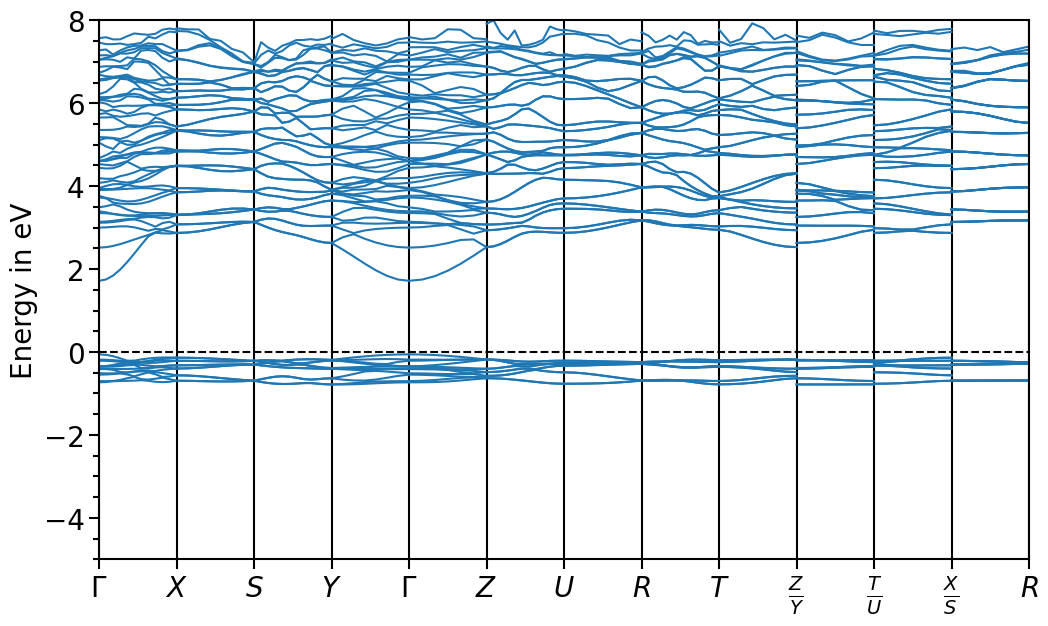

In [5]:
plot = bands_plot.plot("test")